In [1]:
import numpy as np
import fitsio
from astropy.table import Table, join, vstack
import os, sys
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import pandas as pd
import h5py
import corner
import mpl_scatter_density

# Make the norm object to define the image stretch
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(vmin=0., vmax=1000, stretch=LogStretch())

import sys
sys.path.insert(0, '/global/homes/s/severett/repos/balutils/')
from balutils import stacked_catalogs as sc

import seaborn as sb
plt.style.use('seaborn')
sb.set_context("notebook", font_scale=1.5)

/global/homes/s/severett/.conda/envs/balrog-plots/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  if __name__ == '__main__':


In [19]:
run = 'y3-merged'
ver = '1.2'

match_file = '/project/projectdirs/des/severett/Balrog/{}/stacked_catalogs/{}/sof/balrog_matched_catalog_sof_{}_v{}.fits'.format(run, ver, run, ver)
det_file = '/project/projectdirs/des/severett/Balrog/{}/stacked_catalogs/{}/sof/balrog_detection_catalog_sof_{}_v{}.fits'.format(run, ver, run, ver)

In [29]:
# from astropy.io import fits
# with fits.open(match_file) as f:
#     print(f[1].columns)

In [35]:
match_cols = ['bal_id', 'true_id', 'meas_cm_mag_deredden', 'meas_cm_mag', 'true_bdf_mag_deredden', 'true_gap_flux_fwhm4asec', 'meas_gapflux',
              'meas_cm_fracdev', 'true_bdf_fracdev', 'meas_cm_T', 'true_bdf_T', 'meas_cm_s2n_r', 'meas_cm_TdByTe',
              'meas_cm_g', 'meas_cm_flux_s2n', 'ra', 'dec']
det_cols = ['bal_id', 'meas_FLAGS_GOLD_SOF_ONLY', 'flags_foreground', 'flags_footprint', 'flags_badregions', 'match_flag_1.5_asec',
            'meas_EXTENDED_CLASS_SOF']
# sof = sc.BalrogMatchedCatalog(match_file, det_file, match_cols=match_cols, match_type='sof_only', vb=True)

print('Loading matched file...')
match = Table(fitsio.read(match_file, columns=match_cols))
print('Loading det file...')
det = Table(fitsio.read(det_file, columns=det_cols))
print('joining...')
sof = join(match, det, keys='bal_id', join_type='inner')
assert len(match) == len(sof)

# Match to Ian's DF classifier
df_file = 'cats/ugriz-mof02-JHK-extcorr_27May20_kNN_class.fits'
df = Table.read(df_file)
df.rename_column('id', 'true_id')

print('Joining with df classifier...')
sof = join(sof, df, keys='true_id', join_type='left')

cuts = np.where(
    (sof['meas_FLAGS_GOLD_SOF_ONLY'] < 2) &
    (sof['flags_foreground'] == 0 ) &
    (sof['flags_footprint'] == 1) &
    (sof['flags_badregions'] < 2) &
#     (sof['meas_EXTENDED_CLASS_SOF'] > 1) &
    (sof['match_flag_1.5_asec'] < 2)
)

print('Making cuts...')
sof = sof[cuts]

outdir = '/project/projectdirs/des/severett/Balrog/paper-plots/cats'
sof_file = os.path.join(outdir, 'balrog_sof_galaxy_compare.fits')
print('Writing catalog...')
sof.write(sof_file, overwrite=True)

Loading matched file...
Loading det file...
joining...
Joining with df classifier...
Making cuts...
Writing catalog...


In [54]:
~ 

Permission denied (gssapi-keyex,gssapi-with-mic).
lost connection


## Create GOLD Catalog

In [26]:
# mastercat_file = '/project/projectdirs/des/www/y3_cats/Y3_mastercat_03_31_20.h5'

# gld = Table()

# gld_cols = ['flags_foreground', 'flags_footprint', 'flags_badregions', 'flags_gold',
#             'sof_cm_mag_corrected_g', 'sof_cm_mag_corrected_r', 'sof_cm_mag_corrected_i', 'sof_cm_mag_corrected_z',
#             'sof_cm_T', 'sof_cm_fracdev', 'sof_cm_s2n_r']

# with h5py.File(mastercat_file, 'r') as mc:
# #     print(mc['catalog/gold'].keys())
#     select = mc['index/select'][:]
#     print(select)
#     for col in gld_cols:
#         print(col)
# #         if col not in mc['catalog/gold'].keys():
# #             print(f'{col} not in mastercat, skipping for now')
#         try:
#             gld[col] = mc[f'catalog/gold/{col}'][:][select]
#         except KeyError:
#             print(f'{col} not in mastercat, skipping for now')
        
# outdir = '/project/projectdirs/des/severett/Balrog/paper-plots/cats/'
# gld.write(outdir, 'y3_gold_2_2_galaxy_compare_mc.fits', overwrite=True)

[     7390      7391      7393 ... 399243228 399243235 399243240]
flags_foreground
flags_footprint
flags_badregions
flags_gold
sof_cm_mag_corrected_g
sof_cm_mag_corrected_r
sof_cm_mag_corrected_i
sof_cm_mag_corrected_z
sof_cm_T
sof_cm_T not in mastercat, skipping for now
sof_cm_fracdev
sof_cm_s2n_r
sof_cm_s2n_r not in mastercat, skipping for now


IORegistryError: Format could not be identified based on the file name or contents, please provide a 'format' argument.
The available formats are:
           Format           Read Write Auto-identify Deprecated
--------------------------- ---- ----- ------------- ----------
                      ascii  Yes   Yes            No           
               ascii.aastex  Yes   Yes            No           
                ascii.basic  Yes   Yes            No           
     ascii.commented_header  Yes   Yes            No           
                  ascii.csv  Yes   Yes           Yes           
                 ascii.ecsv  Yes   Yes           Yes           
           ascii.fast_basic  Yes   Yes            No           
ascii.fast_commented_header  Yes   Yes            No           
             ascii.fast_csv  Yes   Yes            No           
       ascii.fast_no_header  Yes   Yes            No           
             ascii.fast_rdb  Yes   Yes            No           
             ascii.fast_tab  Yes   Yes            No           
          ascii.fixed_width  Yes   Yes            No           
ascii.fixed_width_no_header  Yes   Yes            No           
 ascii.fixed_width_two_line  Yes   Yes            No           
                 ascii.html  Yes   Yes           Yes           
                 ascii.ipac  Yes   Yes            No           
                ascii.latex  Yes   Yes           Yes           
            ascii.no_header  Yes   Yes            No           
                  ascii.rdb  Yes   Yes           Yes           
                  ascii.rst  Yes   Yes            No           
                  ascii.tab  Yes   Yes            No           
                       asdf  Yes   Yes           Yes           
                       fits  Yes   Yes           Yes           
                       hdf5  Yes   Yes           Yes           
                   jsviewer   No   Yes            No           
                 pandas.csv  Yes   Yes            No           
                pandas.html  Yes   Yes            No           
                pandas.json  Yes   Yes            No           
                    votable  Yes   Yes           Yes           
                     aastex  Yes   Yes            No        Yes
                        csv  Yes   Yes            No        Yes
                       html  Yes   Yes            No        Yes
                       ipac  Yes   Yes            No        Yes
                      latex  Yes   Yes            No        Yes
                        rdb  Yes   Yes            No        Yes

## Load Existing Catalogs

In [5]:
print('Reading Balrog...')
outdir = '/project/projectdirs/des/severett/Balrog/paper-plots/cats/'
sof_file = os.path.join(outdir, 'balrog_sof_galaxy_compare.fits')
sof = Table.read(sof_file)

# print('Reading GOLD...')
# gld_file = '/project/projectdirs/des/severett/Balrog/paper-plots/cats/db_queries/y3_gold_2_2_galaxy_compare_s2n_000001.fits'
# gld = fitsio.read(gld_file)

Reading Balrog...


## Comparisons

In [6]:
def grab_gold_sample(N, gold_dir='/project/projectdirs/des/severett/Balrog/paper-plots/cats/db_queries/', Nfiles=2, use_all=True, vb=True):
    gld_files = glob(os.path.join(gold_dir, '*.fits'))
    
    if use_all is True:
        gld_file = os.path.join(gold_dir, 'y3_gold_2_2_galaxy_compare_no_s2n_collated.fits')
        
#         with fitsio.read_header(f, ext=1)
        h = fitsio.read_header(f, ext=1)
        l = h['NAXIS2']
        rows = np.random.choice(Nbal, Nsamples, replace=False)
        f = '/project/projectdirs/des/severett/Balrog/paper-plots/cats/y3_gold_2_2_galaxy_compare_no_s2n_collated.fits'
        t = fitsio.read(f, rows=rows)
        gld = np.random.choice(gld, size=N, replace=False)

    else:
        gld_file = np.random.choice(gld_files, Nfiles, replace=True)

        cats = []
        k = 0
        for f in gld_file:
            k += 1

            if vb is True:
                print(f'Loading {k} of {Nfiles}...')

            cats.append(Table(fitsio.read(f)))

        print('Stacking...')
        gld = vstack(cats)

        print(f'Sampling {N} objects...')
        gld = np.random.choice(gld, size=N, replace=False)
    
    return gld

def asdf():
    pass

def calc_stats(bal, gld):
    bal_med = np.median(bal)
    bal_avg = np.mean(bal)
    gld_med = np.median(gld)
    gld_avg = np.mean(gld)
    
    return bal_med, bal_avg, gld_med, gld_avg

In [25]:
# gld1 = gld[gld['EXTENDED_CLASS_SOF'] > 1]
# gld2 = gld[gld['EXTENDED_CLASS_MASH_MOF'] > 1]

In [6]:
# Add mcal

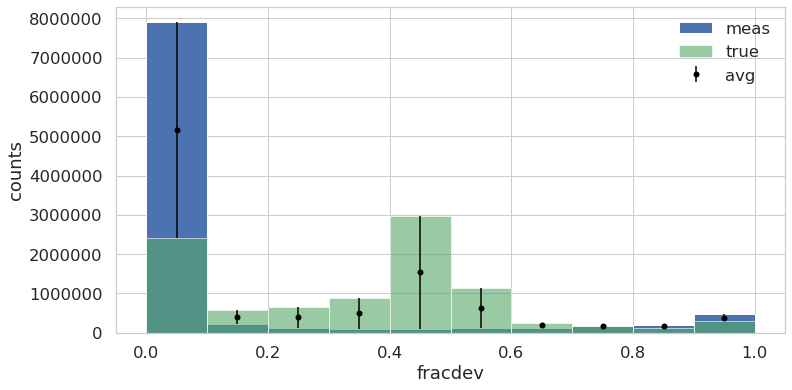

In [7]:
bins = np.arange(0, 1+.1, .1)
h1, *_ = plt.hist(sof['meas_cm_fracdev'], bins=bins, label='meas')
h2, *_ = plt.hist(sof['true_bdf_fracdev'], bins=bins, label='true', alpha=0.6)

# h1, *_ = np.histogram(sof['meas_cm_fracdev'], bins=bins)
# h2, *_ = np.histogram(sof['true_bdf_fracdev'], bins=bins)

h3 = [(x1+x2)/2 for x1,x2 in zip(h1,h2)]
std = [np.std([x1, x2]) for x1,x2 in zip(h1,h2)]

x = np.mean([bins[:-1], bins[1:]], axis=0)
plt.errorbar(x, h3, std, label='avg', c='k', fmt='o')
# plt.step(x, h3, c='k', where='pre')
plt.xlabel('fracdev')
plt.ylabel('counts')
plt.legend()
plt.gcf().set_size_inches(12, 6)

In [8]:
# gld = gld[gld['EXTENDED_CLASS_SOF'] > 1]
# sof = sof[sof['meas_EXTENDED_CLASS_SOF'] > 1]

sb.set_style('whitegrid')

fig = plt.figure(constrained_layout=True)

Nrows, Ncols = 3, 4
w, h = 0, 2
outer = fig.add_gridspec(Nrows, Ncols, wspace=w, hspace=h)

vb = True
vb_iter = False

N_iterations = 20

histtype = 'step'

normed = False

bindx = dict(zip('griz', range(4)))

xlim = {
    'meas_cm_mag_deredden' : [16, 26],
    'meas_cm_mag' : [17, 26],
    'g-r' : [-2, 4],
    'r-i' : [-2, 4],
    'i-z' : [-2, 4],
    'meas_cm_g_1' : [-1, 1],
    'meas_cm_g_2' : [-1, 1],
    'meas_cm_T' : [-5, 100],
    'meas_cm_fracdev': [0, 1],
    'meas_cm_flux_s2n_i' : [0, 100],
    'meas_cm_TdByTe' : [0, 100]
}

dx = {
    'meas_cm_mag_deredden' : 0.25,
    'meas_cm_mag' : 0.25,
    'g-r' : .25,
    'r-i' : .25,
    'i-z' : .25,
    'meas_cm_g_1' : 0.1,
    'meas_cm_g_2' : 0.1,
    'meas_cm_T' : 5,
    'meas_cm_fracdev' : 0.05,
    'meas_cm_flux_s2n_i' : 5,
    'meas_cm_TdByTe' : 5
}

bal_c = 'tab:blue'
gld_c = 'tab:red'

cols = ['meas_cm_g_1', 'meas_cm_g_2', 'meas_cm_T', 'meas_cm_fracdev', 'meas_cm_TdByTe', 'meas_cm_flux_s2n_i']

mag_colname = 'meas_cm_mag_deredden'
# mag_colname = 'meas_cm_mag'

N_bal = len(sof)
# N_bal = int(1e5)
Nfiles = 2

gld_hist = {}

print('Starting GOLD iterations...')
if N_iterations is None:
    gld_file = '/project/projectdirs/des/severett/Balrog/paper-plots/cats/db_queries/y3_gold_2_2_galaxy_compare_s2n_000001.fits'
    gld = Table.read(gld_file)
    
    #...
    
else: 
    for n in range(N_iterations):
        print(f'Iteration {n+1} of {N_iterations}')
        
        gld = grab_gold_sample(N_bal, Nfiles=Nfiles)
    
        k = 0
        
        # Mags
        for b in 'griz':
            k += 1
            
            if vb_iter is True:
                print(b, k)

            col = mag_colname

            if 'deredden' in col:
                gcol = f'SOF_CM_MAG_CORRECTED_{b}'.upper()
            else:
                gcol = f'SOF_CM_MAG_{b}'.upper()
                
            if n == 0:
                gld_hist[f'{col}_{b}'] = []
                
            bi = bindx[b]
                        
            gld_x = gld[gcol]
                    
            xbins = np.arange(xlim[col][0], xlim[col][1]+dx[col], dx[col])
            gld_h, *_ = np.histogram(gld_x, bins=xbins, density=normed)
            gld_hist[f'{col}_{b}'].append(gld_h)
           
        # Colors
        for b1, b2 in zip('gr', 'ri'):
            k += 1

            if vb_iter is True:
                print(f'{b1}-{b2}, {k}')

            col = f'{b1}-{b2}'
                
            if 'deredden' in col:
                gcol = 'SOF_CM_MAG_CORRECTED'
            else:
                gcol = 'SOF_CM_MAG'
                
            if n == 0:
                gld_hist[col] = []

            b1i = bindx[b1]
            b2i = bindx[b2]

            gld_x = gld[f'{gcol}_{b1}'.upper()] - gld[f'{gcol}_{b2}'.upper()]

            xbins = np.arange(xlim[col][0], xlim[col][1]+dx[col], dx[col])
            gld_h, *_ = np.histogram(gld_x, bins=xbins, density=normed)
            gld_hist[col].append(gld_h)
            
        # Rest of cols
        for col in cols:
            k += 1

            if vb_iter is True:
                print(col, k)
                
            if n == 0:
                gld_hist[col] = []

            gld_x = gld[col.replace('meas', 'sof').upper()]
            
            xbins = np.arange(xlim[col][0], xlim[col][1]+dx[col], dx[col])
            gld_h, *_ = np.histogram(gld_x, bins=xbins, density=normed)
            gld_hist[col].append(gld_h)

gld_mean = {}
gld_std = {}
for col, vals in gld_hist.items():
    gld_mean[col] = np.mean(vals, axis=0)
    gld_std[col] = np.std(vals, axis=0)
    
# Now do Balrog
print('Plotting...')

height_ratios = [3, 1]

k = 0
for b in 'griz':
    k += 1
    
    bi = bindx[b]
    if vb is True:
        print(b, k)

    col = mag_colname
                
    bal_x = sof[col][:,bi]

    inner = outer[k-1].subgridspec(2, 1, wspace=0, hspace=0, height_ratios=height_ratios)
    
    # Histogram plot
    fig.add_subplot(inner[0, 0])
    
    if k == 1:
        l1 = 'Balrog'
        l2 = 'Y3 GOLD'
    else:
        l1, l2 = None, None
    
    ax1 = plt.gca()
    xbins = np.arange(xlim[col][0], xlim[col][1]+dx[col], dx[col])
    bin_means = np.mean([xbins[:-1], xbins[1:]], axis=0)
    bal_h = sb.distplot(bal_x, bins=xbins, hist_kws={'label':l1, 'histtype':histtype, 'lw':3},
                        norm_hist=normed, kde=False, kde_kws={'linewidth':3}, color=bal_c, axlabel=False)
    plt.errorbar(bin_means, gld_mean[f'{col}_{b}'], gld_std[f'{col}_{b}'], fmt='o', c='k', label=l2)
    
    if (normed is False) and (k == 1):
        plt.ylabel('Counts')
    plt.xlim(xlim[col])
    plt.yscale('log')
    if k == 1:
        plt.legend(loc='upper left')
        
    # Residuals plot
    fig.add_subplot(inner[1, 0])

    ax2 = plt.gca()
    residuals = (np.histogram(bal_x, bins=xbins)[0] - gld_mean[f'{col}_{b}'])# / gld_mean[f'{col}_{b}']
    err = gld_std[f'{col}_{b}']
    plt.errorbar(bin_means, residuals, err, fmt='ok')
    plt.axhline(0, c='k', lw=2, ls='--')
    plt.xlabel(f'Meas {b}-mag (cm)')
    if k == 1:
        plt.ylabel('Residuals')
    
    ax1.get_shared_x_axes().join(ax1, ax2)
    ax1.set_xticklabels([])
    ax2.autoscale()
            
for b1, b2 in zip('gr', 'ri'):
    k += 1
    
    if vb is True:
        print(f'{b1}-{b2}, {k}')
        
    col = mag_colname

    b1i = bindx[b1]
    b2i = bindx[b2]
    
    bal_x = sof[col][:,b1i] - sof[col][:,b2i]
    
    inner = outer[k-1].subgridspec(2, 1, wspace=0, hspace=0, height_ratios=height_ratios)
    
    # Histogram plot
    fig.add_subplot(inner[0, 0])
    
    ax1 = plt.gca()
    xbins = np.arange(xlim[f'{b1}-{b2}'][0], xlim[f'{b1}-{b2}'][1]+dx[f'{b1}-{b2}'], dx[f'{b1}-{b2}'])
    bin_means = np.mean([xbins[:-1], xbins[1:]], axis=0)
    bal_j = sb.distplot(bal_x, bins=xbins, norm_hist=normed, hist_kws={'histtype':histtype, 'lw':3}, kde=False, kde_kws={'linewidth':2}, color=bal_c)
    plt.errorbar(np.mean([xbins[:-1], xbins[1:]], axis=0), gld_mean[f'{b1}-{b2}'], gld_std[f'{b1}-{b2}'], fmt='o', c='k')

    if (normed is False) and (k == 5):
        plt.ylabel('Counts')
    plt.xlim(xlim[f'{b1}-{b2}'])
    plt.yscale('log')

    # Residuals plot
    fig.add_subplot(inner[1, 0])
        
    ax2 = plt.gca()
    residuals = np.histogram(bal_x, bins=xbins)[0] - gld_mean[f'{b1}-{b2}']
    err = gld_std[f'{b1}-{b2}']
    plt.errorbar(bin_means, residuals, err, fmt='ok')
    plt.axhline(0, c='k', lw=2, ls='--')
    plt.xlabel(f'{b1}-{b2}')
    if k == 5:
        plt.ylabel('Residuals')
    
    ax1.get_shared_x_axes().join(ax1, ax2)
    ax1.set_xticklabels([])
    ax2.autoscale()
    
# For ease
sof['meas_cm_g_1'] = sof['meas_cm_g'][:,0]
sof['meas_cm_g_2'] = sof['meas_cm_g'][:,1]
sof['meas_cm_flux_s2n_i'] = sof['meas_cm_flux_s2n'][:,2]
for col in cols:
    k += 1
    
    if vb is True:
        print(col, k)
        
    bal_x = sof[col]
    
    inner = outer[k-1].subgridspec(2, 1, wspace=0, hspace=0, height_ratios=height_ratios)
    
    # Histogram plot
    fig.add_subplot(inner[0, 0])
    
    if 'fracdev' in col:
        kws = {'bw' : 0.01}
    else:
        kws = None
    
    ax1 = plt.gca()
    xbins = np.arange(xlim[col][0], xlim[col][1]+dx[col], dx[col])
    bin_means = np.mean([xbins[:-1], xbins[1:]], axis=0)
    bal_h = sb.distplot(bal_x, bins=xbins, hist_kws={'histtype':histtype, 'lw':3}, kde_kws=kws, norm_hist=normed, kde=False, color=bal_c)#linewidth=2)
    plt.errorbar(np.mean([xbins[:-1], xbins[1:]], axis=0), gld_mean[col], gld_std[col], fmt='o', c='k')

    if (normed is False) and (k == 9):
        plt.ylabel('Counts')
    plt.xlim(xlim[col])
    plt.yscale('log')
        
    # Residuals plot
    fig.add_subplot(inner[1, 0])
    
    ax2 = plt.gca()
    residuals = np.histogram(bal_x, bins=xbins)[0] - gld_mean[col]
    err = gld_std[col]
    plt.errorbar(bin_means, residuals, err, fmt='ok')
    plt.axhline(0, c='k', lw=2, ls='--')
    plt.xlabel(f'{col}')
    if k == 9:
        plt.ylabel('Residuals')
    
    ax1.get_shared_x_axes().join(ax1, ax2)
    ax1.set_xticklabels([])
    ax2.autoscale()

# plt.tight_layout()
plt.rcParams.update({'font.size': 24})
fig.set_size_inches(26, 20)

Starting GOLD iterations...
Iteration 1 of 20


UnboundLocalError: local variable 'f' referenced before assignment

<Figure size 432x288 with 0 Axes>

Starting GOLD iterations...
Iteration 1 of 1
Plotting...
g 1
r 2
i 3
z 4
g-r, 5
r-i, 6
meas_cm_g_1 7
meas_cm_g_2 8
meas_cm_T 9
meas_cm_fracdev 10
meas_cm_TdByTe 11
meas_cm_flux_s2n_i 12


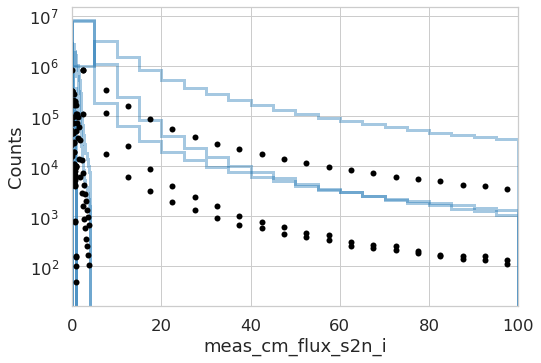

In [17]:
# gld = gld[gld['EXTENDED_CLASS_SOF'] > 1]
# sof = sof[sof['meas_EXTENDED_CLASS_SOF'] > 1]

sb.set_style('whitegrid')

fig = plt.Figure(figsize=(28, 16))

Nrows, Ncols = 3, 4
outer = gridspec.GridSpec(Nrows, Ncols, wspace=w, hspace=h)

vb = True
vb_iter = False

N_iterations = 1

histtype = 'step'

normed = False

bindx = dict(zip('griz', range(4)))

xlim = {
    'meas_cm_mag_deredden' : [16, 26],
    'meas_cm_mag' : [17, 26],
    'g-r' : [-2, 4],
    'r-i' : [-2, 4],
    'i-z' : [-2, 4],
    'meas_cm_g_1' : [-1, 1],
    'meas_cm_g_2' : [-1, 1],
    'meas_cm_T' : [-5, 100],
    'meas_cm_fracdev': [0, 1],
    'meas_cm_flux_s2n_i' : [0, 100],
    'meas_cm_TdByTe' : [0, 100]
}

dx = {
    'meas_cm_mag_deredden' : 0.25,
    'meas_cm_mag' : 0.25,
    'g-r' : .25,
    'r-i' : .25,
    'i-z' : .25,
    'meas_cm_g_1' : 0.1,
    'meas_cm_g_2' : 0.1,
    'meas_cm_T' : 5,
    'meas_cm_fracdev' : 0.05,
    'meas_cm_flux_s2n_i' : 5,
    'meas_cm_TdByTe' : 5
}

bal_c = 'tab:blue'
gld_c = 'tab:red'

cols = ['meas_cm_g_1', 'meas_cm_g_2', 'meas_cm_T', 'meas_cm_fracdev', 'meas_cm_TdByTe', 'meas_cm_flux_s2n_i']

# mag_colname = 'meas_cm_mag_deredden'
mag_colname = 'meas_cm_mag'

# N_bal = len(sof)
N_bal = int(1e6)

gld_hist = {}

print('Starting GOLD iterations...')
if N_iterations is None:
    gld_file = '/project/projectdirs/des/severett/Balrog/paper-plots/cats/db_queries/y3_gold_2_2_galaxy_compare_s2n_000001.fits'
    gld = Table.read(gld_file)
    
    #...
    
else: 
    for n in range(N_iterations):
        print(f'Iteration {n+1} of {N_iterations}')
        
        gld = grab_gold_sample(N_bal)
    
        k = 0
        
        # Mags
        for b in 'griz':
            k += 1
            
            if vb_iter is True:
                print(b, k)

            col = mag_colname

            if 'deredden' in col:
                gcol = f'SOF_CM_MAG_CORRECTED_{b}'.upper()
            else:
                gcol = f'SOF_CM_MAG_{b}'.upper()
                
            if n == 0:
                gld_hist[f'{col}_{b}'] = []
                
            bi = bindx[b]
                        
            gld_x = gld[gcol]
                    
            xbins = np.arange(xlim[col][0], xlim[col][1]+dx[col], dx[col])
            gld_h, *_ = np.histogram(gld_x, bins=xbins, density=normed)
            gld_hist[f'{col}_{b}'].append(gld_h)
           
        # Colors
        for b1, b2 in zip('gr', 'ri'):
            k += 1

            if vb_iter is True:
                print(f'{b1}-{b2}, {k}')

            col = f'{b1}-{b2}'
                
            if 'deredden' in col:
                gcol = 'SOF_CM_MAG_CORRECTED'
            else:
                gcol = 'SOF_CM_MAG'
                
            if n == 0:
                gld_hist[col] = []

            b1i = bindx[b1]
            b2i = bindx[b2]

            gld_x = gld[f'{gcol}_{b1}'.upper()] - gld[f'{gcol}_{b2}'.upper()]

            xbins = np.arange(xlim[col][0], xlim[col][1]+dx[col], dx[col])
            gld_h, *_ = np.histogram(gld_x, bins=xbins, density=normed)
            gld_hist[col].append(gld_h)
            
        # Rest of cols
        for col in cols:
            k += 1

            if vb_iter is True:
                print(col, k)
                
            if n == 0:
                gld_hist[col] = []

            gld_x = gld[col.replace('meas', 'sof').upper()]
            
            xbins = np.arange(xlim[col][0], xlim[col][1]+dx[col], dx[col])
            gld_h, *_ = np.histogram(gld_x, bins=xbins, density=normed)
            gld_hist[col].append(gld_h)

gld_mean = {}
gld_std = {}
for col, vals in gld_hist.items():
    gld_mean[col] = np.mean(vals, axis=0)
    gld_std[col] = np.std(vals, axis=0)
    
# Now do Balrog
print('Plotting...')

k = 0
for b in 'griz':
    k += 1
    
    bi = bindx[b]
    if vb is True:
        print(b, k)

    col = mag_colname
                
    bal_x = sof[col][:,bi]
    
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                                             subplot_spec=outer[k-1],
                                             wspace=0.1, hspace=0.1)
        
#     plt.subplot(Nrows, Ncols, k)
    ax1 = plt.Subplot(fig, inner[0, 0])
    
    if k == 1:
        l1 = 'Balrog'
        l2 = 'Y3 GOLD'
    else:
        l1, l2 = None, None
    
    xbins = np.arange(xlim[col][0], xlim[col][1]+dx[col], dx[col])
    bin_means = np.mean([xbins[:-1], xbins[1:]], axis=0)
    bal_h = sb.distplot(bal_x, bins=xbins, hist_kws={'label':l1, 'histtype':histtype, 'lw':3}, norm_hist=normed, kde=False, kde_kws={'linewidth':2}, color=bal_c, ax=ax1)
    ax1.errorbar(bin_means, gld_mean[f'{col}_{b}'], gld_std[f'{col}_{b}'], fmt='o', c='k', label=l2)
#     sb.distplot(gld_x, bins=xbins, hist_kws={'label':l2, 'histtype':histtype, 'lw':3}, norm_hist=normed, kde=False, kde_kws={'linewidth':2, 'linestyle':'--'}, color=gld_c)
#     plt.axvline(bal_med, lw=2, ls='--', label=f'med={bal_med:.3f}', color='k')
#     plt.axvline(gld_med, lw=2, ls=':', label=f'med={gld_med:.3f}', color='k')
    ax1.set_xlabel(f'Meas {b}-mag (cm)')
    if normed is False:
        ax1.set_ylabel('Counts')
    ax1.set_xlim(xlim[col])
    ax1.set_yscale('log')
    if k == 1:
        ax1.legend(loc='upper left')
    fig.add_subplot(ax1)
        
    ax2 = plt.Subplot(fig, inner[1, 0])
#     residuals = bal_h.lines[k-1].get_ydata() - gld_mean[f'{col}_{b}']
    residuals = np.histogram(bal_x, bins=xbins)[0] - gld_mean[f'{col}_{b}']
    err = gld_std[f'{col}_{b}']
    ax2.errorbar(bin_means, residuals, err, fmt='k')
    ax2.axhline(0, c='k', lw=2, ls='--')
    ax2.set_xlabel(f'Meas {b}-mag (cm)')
    ax2.set_ylabel('Residuals')
    fig.add_subplot(ax2)
    
# plt.show()
        
for b1, b2 in zip('gr', 'ri'):
    k += 1
    
    if vb is True:
        print(f'{b1}-{b2}, {k}')
        
    col = mag_colname

    b1i = bindx[b1]
    b2i = bindx[b2]
    
    bal_x = sof[col][:,b1i] - sof[col][:,b2i]
    
    bal_med, bal_avg, gld_med, gld_avg = calc_stats(bal_x, gld_x)
    
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                                             subplot_spec=outer[k-1],
                                             wspace=0.1, hspace=0.1)
        
#     plt.subplot(Nrows, Ncols, k)
    ax = plt.Subplot(fig, inner[0, 0])
    
    xbins = np.arange(xlim[f'{b1}-{b2}'][0], xlim[f'{b1}-{b2}'][1]+dx[f'{b1}-{b2}'], dx[f'{b1}-{b2}'])
    bin_means = np.mean([xbins[:-1], xbins[1:]], axis=0)
#     print(f'bal_x = {bal_x}')
#     print(f'xbins = {xbins}')
    bal_j = sb.distplot(bal_x, bins=xbins, norm_hist=normed, hist_kws={'histtype':histtype, 'lw':3}, kde=False, kde_kws={'linewidth':2}, color=bal_c)
    plt.errorbar(np.mean([xbins[:-1], xbins[1:]], axis=0), gld_mean[f'{b1}-{b2}'], gld_std[f'{b1}-{b2}'], fmt='o', c='k')
#     sb.distplot(gld_x, bins=xbins, norm_hist=normed, hist_kws={'histtype':histtype, 'lw':3}, kde=False, kde_kws={'linewidth':2, 'linestyle':'--'}, color=gld_c)
#     plt.axvline(bal_med, lw=2, ls='--', label=f'med={bal_med:.3f}', color='k')
#     plt.axvline(gld_med, lw=2, ls=':', label=f'med={gld_med:.3f}', color='k')
    plt.xlabel(f'{b1}-{b2} mag (cm)')
    if normed is False:
        plt.ylabel('Counts')
    plt.xlim(xlim[f'{b1}-{b2}'])
    plt.yscale('log')
#     plt.legend()    
    fig.add_subplot(ax)
        
    ax = plt.Subplot(fig, inner[1, 0])
#     residuals = bal_j.lines[k-1].get_ydata() - gld_mean[f'{b1}-{b2}']
#     x1 = np.histogram(bal_x, bins=xbins)[0]
#     x2 = gld_mean[f'{b1}-{b2}']
#     print(x1)
#     print(x2)
    residuals = np.histogram(bal_x, bins=xbins)[0] - gld_mean[f'{b1}-{b2}']
    err = gld_std[f'{b1}-{b2}']
    ax.errorbar(bin_means, residuals, err, fmt='k')
    ax.axhline(0, c='k', lw=2, ls='--')
    ax.set_xlabel(f'{b1}-{b2}')
    ax.set_ylabel('Residuals')
    fig.add_subplot(ax)
    
# For ease
sof['meas_cm_g_1'] = sof['meas_cm_g'][:,0]
sof['meas_cm_g_2'] = sof['meas_cm_g'][:,1]
sof['meas_cm_flux_s2n_i'] = sof['meas_cm_flux_s2n'][:,2]
for col in cols:
    k += 1
    
    if vb is True:
        print(col, k)
        
    bal_x = sof[col]
    
    bal_med, bal_avg, gld_med, gld_avg = calc_stats(bal_x, gld_x)
    
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                                             subplot_spec=outer[k-1],
                                             wspace=0.1, hspace=0.1)
        
#     plt.subplot(Nrows, Ncols, k)
    ax = plt.Subplot(fig, inner[0, 0])
    
    if 'fracdev' in col:
        kws = {'bw' : 0.01}
    else:
        kws = None
    
    xbins = np.arange(xlim[col][0], xlim[col][1]+dx[col], dx[col])
    bin_means = np.mean([xbins[:-1], xbins[1:]], axis=0)
    bal_h = sb.distplot(bal_x, bins=xbins, hist_kws={'histtype':histtype, 'lw':3}, kde_kws=kws, norm_hist=normed, kde=False, color=bal_c)#linewidth=2)
    plt.errorbar(np.mean([xbins[:-1], xbins[1:]], axis=0), gld_mean[col], gld_std[col], fmt='o', c='k')
#     sb.distplot(gld_x, bins=xbins, hist_kws={'histtype':histtype, 'lw':3}, kde_kws=kws, norm_hist=normed, kde=False, color=gld_c)#linewidth=2, linestyle='--')
#     plt.axvline(bal_med, lw=2, ls='--', label=f'med={bal_med:.3f}', color='k')
#     plt.axvline(gld_med, lw=2, ls=':', label=f'med={gld_med:.3f}', color='k')
    plt.xlabel(f'{col}')
    if normed is False:
        plt.ylabel('Counts')
    plt.xlim(xlim[col])
    plt.yscale('log')
#     plt.legend()
    fig.add_subplot(ax)
        
    ax = plt.Subplot(fig, inner[1, 0])
#     residuals = bal_h.lines[k-1].get_ydata() - gld_mean[col]
    residuals = np.histogram(bal_x, bins=xbins)[0] - gld_mean[col]
    err = gld_std[col]
    ax.errorbar(bin_means, residuals, err, fmt='k')
    ax.axhline(0, c='k', lw=2, ls='--')
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('Residuals')
    fig.add_subplot(ax)

plt.show()

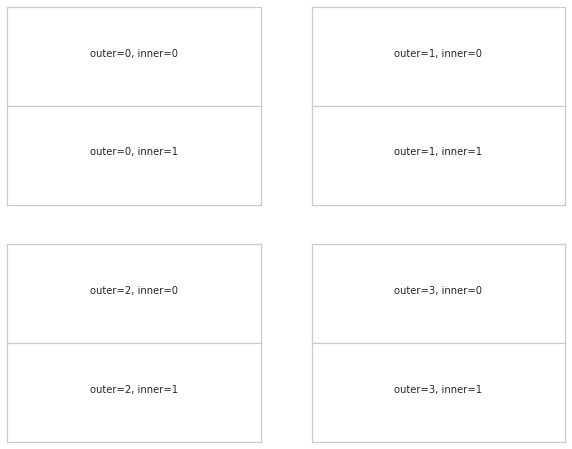

In [155]:
fig = plt.figure(figsize=(10, 8))
outer = gridspec.GridSpec(2, 2, wspace=0.2, hspace=0.2)

for i in range(4):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                    subplot_spec=outer[i], wspace=0, hspace=0)

    for j in range(2):
        ax = plt.Subplot(fig, inner[j])
        t = ax.text(0.5,0.5, 'outer=%d, inner=%d' % (i,j))
        t.set_ha('center')
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)

fig.show()

g 1
r 2
i 3
z 4


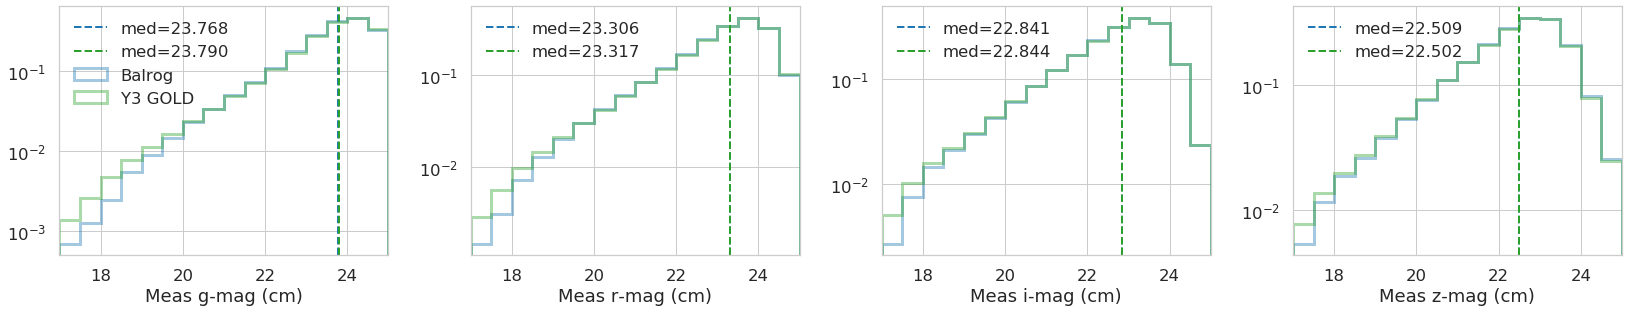

In [6]:
sb.set_style('whitegrid')

fig = plt.Figure()

vb = True

bindx = dict(zip('griz', range(4)))

xlim = {
    'meas_cm_mag_deredden' : [17, 25],
    'g-r' : [-2, 4],
    'r-i' : [-2, 4],
    'i-z' : [-2, 4],
    'meas_cm_g_1' : [-1, 1],
    'meas_cm_g_2' : [-1, 1],
    'meas_cm_T' : [-5, 100],
    'meas_cm_fracdev': [0, 1],
    'meas_cm_flux_s2n_i' : [0, 100],
    'meas_cm_TdByTe' : [0, 100]
}

dx = {
    'meas_cm_mag_deredden' : 0.5,
    'g-r' : .01,
    'r-i' : .01,
    'i-z' : .01,
    'meas_cm_g_1' : 0.1,
    'meas_cm_g_2' : 0.1,
    'meas_cm_T' : 5,
    'meas_cm_fracdev' : 0.05,
    'meas_cm_flux_s2n_i' : 5,
    'meas_cm_TdByTe' : 5
}

bal_c = 'tab:blue'
gld_c = 'tab:green'

Nrows, Ncols = 3, 4
# Nrows, Ncols = 2, 4
gs = gridspec.GridSpec(Nrows, Ncols)

cols = ['meas_cm_g_1', 'meas_cm_g_2', 'meas_cm_T', 'meas_cm_fracdev', 'meas_cm_TdByTe', 'meas_cm_flux_s2n_i']

k = 0
for b in 'griz':
    k += 1
    
    bi = bindx[b]
    if vb is True:
        print(b, k)

    col = 'meas_cm_mag_deredden'
    
    bal_x = sof[col][:,bi]
    gld_x = gld[f'sof_cm_mag_corrected_{b}'.upper()]
    
    bal_cuts = np.where(
        (bal_x >= xlim[col][0]) &
        (bal_x <= xlim[col][1])
    )
    gld_cuts = np.where(
        (gld_x >= xlim[col][0]) &
        (gld_x <= xlim[col][1])
    )    
    bal_x = bal_x[bal_cuts]
    gld_x = gld_x[gld_cuts]
    
    bal_med, bal_avg, gld_med, gld_avg = calc_stats(bal_x, gld_x)
#     print(f'{bal_med:.5f} vs {gld_med:.5f}, {bal_avg:.5f} vs {gld_avg:.5f}')
    
    plt.subplot(Nrows, Ncols, k)
    
    if k == 1:
        l1 = 'Balrog'
        l2 = 'Y3 GOLD'
    else:
        l1, l2 = None, None
    
    xbins = np.arange(xlim[col][0], xlim[col][1]+dx[col], dx[col])
    sb.distplot(bal_x, bins=xbins, hist_kws={'label':l1, 'histtype':'step', 'lw':3}, norm_hist=True, kde=False, kde_kws={'linewidth':3}, color=bal_c)
    sb.distplot(gld_x, bins=xbins, label=l2, norm_hist=True, kde=False, kde_kws={'linewidth':2, 'linestyle':'--'}, color=gld_c, hist_kws={'histtype':'step', 'lw':3})
    plt.axvline(bal_med, lw=2, ls='--', label=f'med={bal_med:.3f}', color=bal_c)
    plt.axvline(gld_med, lw=2, ls='--', label=f'med={gld_med:.3f}', color=gld_c)
    plt.xlabel(f'Meas {b}-mag (cm)')
#     plt.ylabel('Counts')
    plt.xlim(xlim[col])
    plt.yscale('log')
    plt.legend()
        
# for b1, b2 in zip('gr', 'ri'):
#     k += 1
    
#     if vb is True:
#         print(f'{b1}-{b2}, {k}')
        
#     col = 'meas_cm_mag_deredden'
    
#     b1i = bindx[b1]
#     b2i = bindx[b2]
    
#     bal_x = sof[col][:,b1i] - sof[col][:,b2i]
#     gld_x = gld[f'sof_cm_mag_corrected_{b1}'.upper()] - gld1[f'sof_cm_mag_corrected_{b2}'.upper()]
    
#     bal_cuts = np.where(
#         (bal_x >= xlim[f'{b1}-{b2}'][0]) &
#         (bal_x <= xlim[f'{b1}-{b2}'][1])
#     )
#     gld_cuts = np.where(
#         (gld_x >= xlim[f'{b1}-{b2}'][0]) &
#         (gld_x <= xlim[f'{b1}-{b2}'][1])
#     )    
#     bal_x = bal_x[bal_cuts]
#     gld_x = gld_x[gld_cuts]
    
#     bal_med, bal_avg, gld_med, gld_avg = calc_stats(bal_x, gld_x)
    
#     plt.subplot(Nrows, Ncols, k)
    
#     xbins = np.arange(xlim[f'{b1}-{b2}'][0], xlim[f'{b1}-{b2}'][1]+dx[col], dx[col])
#     sb.distplot(bal_x, bins=xbins, norm_hist=True, kde=False, kde_kws={'linewidth':2}, color=bal_c, hist_kws={'histtype':'step', 'lw':3})
#     sb.distplot(gld_x, bins=xbins, norm_hist=True, kde=False, kde_kws={'linewidth':2, 'linestyle':'--'}, color=gld_c, hist_kws={'histtype':'step', 'lw':3})
#     plt.axvline(bal_med, lw=2, ls='--', label=f'med={bal_med:.3f}', color=bal_c)
#     plt.axvline(gld_med, lw=2, ls='--', label=f'med={gld_med:.3f}', color=gld_c)
#     plt.xlabel(f'{b1}-{b2} mag (cm)')
# #     plt.ylabel('Counts')
#     plt.xlim(xlim[f'{b1}-{b2}'])
#     plt.yscale('log')
#     plt.legend()    
    
# # For ease
# sof['meas_cm_g_1'] = sof['meas_cm_g'][:,0]
# sof['meas_cm_g_2'] = sof['meas_cm_g'][:,1]
# sof['meas_cm_flux_s2n_i'] = sof['meas_cm_flux_s2n'][:,2]
# for col in cols:
#     k += 1
    
#     if vb is True:
#         print(col, k)
        
#     bal_x = sof[col]
#     gld_x = gld[col.replace('meas', 'sof').upper()]
    
#     bal_cuts = np.where(
#         (bal_x >= xlim[col][0]) &
#         (bal_x <= xlim[col][1])
#     )
#     gld_cuts = np.where(
#         (gld_x >= xlim[col][0]) &
#         (gld_x <= xlim[col][1])
#     )    
#     bal_x = bal_x[bal_cuts]
#     gld_x = gld_x[gld_cuts]
    
#     bal_med, bal_avg, gld_med, gld_avg = calc_stats(bal_x, gld_x)
    
#     plt.subplot(Nrows, Ncols, k)
    
#     if 'fracdev' in col:
#         kws = {'bw' : 0.01}
#     else:
#         kws = None
    
#     xbins = np.arange(xlim[col][0], xlim[col][1]+dx[col], dx[col])
#     sb.distplot(bal_x, bins=xbins, kde_kws=kws, norm_hist=True, kde=False, color=bal_c, hist_kws={'histtype':'step', 'lw':3})#linewidth=2)
#     sb.distplot(gld_x, bins=xbins, kde_kws=kws, norm_hist=True, kde=False, color=gld_c, hist_kws={'histtype':'step', 'lw':3})#linewidth=2, linestyle='--')
#     plt.axvline(bal_med, lw=2, ls='--', label=f'med={bal_med:.3f}', color=bal_c)
#     plt.axvline(gld_med, lw=2, ls='--', label=f'med={gld_med:.3f}', color=gld_c)
#     plt.xlabel(f'{col}')
# #     plt.ylabel('Counts')
#     plt.xlim(xlim[col])
#     plt.yscale('log')
#     plt.legend()
    
# plt.suptitle('Using EXTENDED_CLASS_SOF > 1')
    
w = 0.25
h = 0.25
plt.subplots_adjust(wspace=w, hspace=h)
plt.gcf().set_size_inches(28, 16)

In [5]:
# gld = gld[gld['EXTENDED_CLASS_SOF'] > 1]
# sof = sof[sof['meas_EXTENDED_CLASS_SOF'] > 1]

sb.set_style('whitegrid')

fig = plt.Figure()

vb = True

histtype = 'step'

normed = False

bindx = dict(zip('griz', range(4)))

xlim = {
    'meas_cm_mag_deredden' : [16, 26],
    'meas_cm_mag' : [17, 26],
    'g-r' : [-2, 4],
    'r-i' : [-2, 4],
    'i-z' : [-2, 4],
    'meas_cm_g_1' : [-1, 1],
    'meas_cm_g_2' : [-1, 1],
    'meas_cm_T' : [-5, 100],
    'meas_cm_fracdev': [0, 1],
    'meas_cm_flux_s2n_i' : [0, 100],
    'meas_cm_TdByTe' : [0, 100]
}

dx = {
    'meas_cm_mag_deredden' : 0.25,
    'meas_cm_mag' : 0.25,
    'g-r' : .25,
    'r-i' : .25,
    'i-z' : .25,
    'meas_cm_g_1' : 0.1,
    'meas_cm_g_2' : 0.1,
    'meas_cm_T' : 5,
    'meas_cm_fracdev' : 0.05,
    'meas_cm_flux_s2n_i' : 5,
    'meas_cm_TdByTe' : 5
}

bal_c = 'tab:blue'
gld_c = 'tab:red'

Nrows, Ncols = 3, 4
gs = gridspec.GridSpec(Nrows, Ncols)

cols = ['meas_cm_g_1', 'meas_cm_g_2', 'meas_cm_T', 'meas_cm_fracdev', 'meas_cm_TdByTe', 'meas_cm_flux_s2n_i']

# mag_colname = 'meas_cm_mag_deredden'
mag_colname = 'meas_cm_mag'

k = 0
for b in 'griz':
    k += 1
    
    bi = bindx[b]
    if vb is True:
        print(b, k)

    col = mag_colname
    
    if 'deredden' in col:
        gcol = 'SOF_CM_MAG_CORRECTED'
    else:
        gcol = 'SOF_CM_MAG'
    
    bal_x = sof[col][:,bi]
    gld_x = gld[f'{gcol}_{b}'.upper()]
    
#     bal_cuts = np.where(
#         (bal_x >= xlim[col][0]) &
#         (bal_x <= xlim[col][1])
#     )
#     gld_cuts = np.where(
#         (gld_x >= xlim[col][0]) &
#         (gld_x <= xlim[col][1])
#     )    
#     bal_x = bal_x[bal_cuts]
#     gld_x = gld_x[gld_cuts]
    
    bal_med, bal_avg, gld_med, gld_avg = calc_stats(bal_x, gld_x)
#     print(f'{bal_med:.5f} vs {gld_med:.5f}, {bal_avg:.5f} vs {gld_avg:.5f}')
    
    plt.subplot(Nrows, Ncols, k)
    
    if k == 1:
        l1 = 'Balrog'
        l2 = 'Y3 GOLD'
    else:
        l1, l2 = None, None
    
    xbins = np.arange(xlim[col][0], xlim[col][1]+dx[col], dx[col])
    sb.distplot(bal_x, bins=xbins, hist_kws={'label':l1, 'histtype':histtype, 'lw':3}, norm_hist=normed, kde=False, kde_kws={'linewidth':2}, color=bal_c)
    sb.distplot(gld_x, bins=xbins, hist_kws={'label':l2, 'histtype':histtype, 'lw':3}, norm_hist=normed, kde=False, kde_kws={'linewidth':2, 'linestyle':'--'}, color=gld_c)
    plt.axvline(bal_med, lw=2, ls='--', label=f'med={bal_med:.3f}', color='k')
    plt.axvline(gld_med, lw=2, ls=':', label=f'med={gld_med:.3f}', color='k')
    plt.xlabel(f'Meas {b}-mag (cm)')
    if normed is False:
        plt.ylabel('Counts')
    plt.xlim(xlim[col])
    plt.yscale('log')
    plt.legend()
        
for b1, b2 in zip('gr', 'ri'):
    k += 1
    
    if vb is True:
        print(f'{b1}-{b2}, {k}')
        
    col = mag_colname
    
    if 'deredden' in col:
        gcol = 'SOF_CM_MAG_CORRECTED'
    else:
        gcol = 'SOF_CM_MAG'
    
    b1i = bindx[b1]
    b2i = bindx[b2]
    
    bal_x = sof[col][:,b1i] - sof[col][:,b2i]
    gld_x = gld[f'{gcol}_{b1}'.upper()] - gld[f'{gcol}_{b2}'.upper()]
    
#     bal_cuts = np.where(
#         (bal_x >= xlim[f'{b1}-{b2}'][0]) &
#         (bal_x <= xlim[f'{b1}-{b2}'][1])
#     )
#     gld_cuts = np.where(
#         (gld_x >= xlim[f'{b1}-{b2}'][0]) &
#         (gld_x <= xlim[f'{b1}-{b2}'][1])
#     )    
#     bal_x = bal_x[bal_cuts]
#     gld_x = gld_x[gld_cuts]
    
    bal_med, bal_avg, gld_med, gld_avg = calc_stats(bal_x, gld_x)
    
    plt.subplot(Nrows, Ncols, k)
    
    xbins = np.arange(xlim[f'{b1}-{b2}'][0], xlim[f'{b1}-{b2}'][1]+dx[col], dx[f'{b1}-{b2}'])
    sb.distplot(bal_x, bins=xbins, norm_hist=normed, hist_kws={'histtype':histtype, 'lw':3}, kde=False, kde_kws={'linewidth':2}, color=bal_c)
    sb.distplot(gld_x, bins=xbins, norm_hist=normed, hist_kws={'histtype':histtype, 'lw':3}, kde=False, kde_kws={'linewidth':2, 'linestyle':'--'}, color=gld_c)
    plt.axvline(bal_med, lw=2, ls='--', label=f'med={bal_med:.3f}', color='k')
    plt.axvline(gld_med, lw=2, ls=':', label=f'med={gld_med:.3f}', color='k')
    plt.xlabel(f'{b1}-{b2} mag (cm)')
    if normed is False:
        plt.ylabel('Counts')
    plt.xlim(xlim[f'{b1}-{b2}'])
    plt.yscale('log')
    plt.legend()    
    
# For ease
sof['meas_cm_g_1'] = sof['meas_cm_g'][:,0]
sof['meas_cm_g_2'] = sof['meas_cm_g'][:,1]
sof['meas_cm_flux_s2n_i'] = sof['meas_cm_flux_s2n'][:,2]
for col in cols:
    k += 1
    
    if vb is True:
        print(col, k)
        
    bal_x = sof[col]
    gld_x = gld[col.replace('meas', 'sof').upper()]
    
#     bal_cuts = np.where(
#         (bal_x >= xlim[col][0]) &
#         (bal_x <= xlim[col][1])
#     )
#     gld_cuts = np.where(
#         (gld_x >= xlim[col][0]) &
#         (gld_x <= xlim[col][1])
#     )    
#     bal_x = bal_x[bal_cuts]
#     gld_x = gld_x[gld_cuts]
    
    bal_med, bal_avg, gld_med, gld_avg = calc_stats(bal_x, gld_x)
    
    plt.subplot(Nrows, Ncols, k)
    
    if 'fracdev' in col:
        kws = {'bw' : 0.01}
    else:
        kws = None
    
    xbins = np.arange(xlim[col][0], xlim[col][1]+dx[col], dx[col])
    sb.distplot(bal_x, bins=xbins, hist_kws={'histtype':histtype, 'lw':3}, kde_kws=kws, norm_hist=normed, kde=False, color=bal_c)#linewidth=2)
    sb.distplot(gld_x, bins=xbins, hist_kws={'histtype':histtype, 'lw':3}, kde_kws=kws, norm_hist=normed, kde=False, color=gld_c)#linewidth=2, linestyle='--')
    plt.axvline(bal_med, lw=2, ls='--', label=f'med={bal_med:.3f}', color='k')
    plt.axvline(gld_med, lw=2, ls=':', label=f'med={gld_med:.3f}', color='k')
    plt.xlabel(f'{col}')
    if normed is False:
        plt.ylabel('Counts')
    plt.xlim(xlim[col])
    plt.yscale('log')
    plt.legend()
    
w = 0.25
h = 0.25
plt.subplots_adjust(wspace=w, hspace=h)
plt.gcf().set_size_inches(28, 16)

g 1


NameError: name 'gld' is not defined

In [3]:
# gld = gld[gld['EXTENDED_CLASS_SOF'] > 1]
# sof = sof[sof['meas_EXTENDED_CLASS_SOF'] > 1]

sb.set_style('whitegrid')

fig = plt.Figure()

Nrows, Ncols = 6, 4
outer = gridspec.GridSpec(Nrows, Ncols, wspace=w, hspace=h)

vb = True
vb_iter = False

N_iterations = 3

histtype = 'step'

normed = False

bindx = dict(zip('griz', range(4)))

xlim = {
    'meas_cm_mag_deredden' : [16, 26],
    'meas_cm_mag' : [17, 26],
    'g-r' : [-2, 4],
    'r-i' : [-2, 4],
    'i-z' : [-2, 4],
    'meas_cm_g_1' : [-1, 1],
    'meas_cm_g_2' : [-1, 1],
    'meas_cm_T' : [-5, 100],
    'meas_cm_fracdev': [0, 1],
    'meas_cm_flux_s2n_i' : [0, 100],
    'meas_cm_TdByTe' : [0, 100]
}

dx = {
    'meas_cm_mag_deredden' : 0.25,
    'meas_cm_mag' : 0.25,
    'g-r' : .25,
    'r-i' : .25,
    'i-z' : .25,
    'meas_cm_g_1' : 0.1,
    'meas_cm_g_2' : 0.1,
    'meas_cm_T' : 5,
    'meas_cm_fracdev' : 0.05,
    'meas_cm_flux_s2n_i' : 5,
    'meas_cm_TdByTe' : 5
}

bal_c = 'tab:blue'
gld_c = 'tab:red'

cols = ['meas_cm_g_1', 'meas_cm_g_2', 'meas_cm_T', 'meas_cm_fracdev', 'meas_cm_TdByTe', 'meas_cm_flux_s2n_i']

# mag_colname = 'meas_cm_mag_deredden'
mag_colname = 'meas_cm_mag'

N_bal = len(sof)
# N_bal = int(1e6)

gld_hist = {}

print('Starting GOLD iterations...')
if N_iterations is None:
    gld_file = '/project/projectdirs/des/severett/Balrog/paper-plots/cats/db_queries/y3_gold_2_2_galaxy_compare_s2n_000001.fits'
    gld = Table.read(gld_file)
    
    #...
    
else: 
    for n in range(N_iterations):
        print(f'Iteration {n+1} of {N_iterations}')
        
        gld = grab_gold_sample(N_bal)
    
        k = 0
        
        # Mags
        for b in 'griz':
            k += 1
            
            if vb_iter is True:
                print(b, k)

            col = mag_colname

            if 'deredden' in col:
                gcol = f'SOF_CM_MAG_CORRECTED_{b}'.upper()
            else:
                gcol = f'SOF_CM_MAG_{b}'.upper()
                
            if n == 0:
                gld_hist[f'{col}_{b}'] = []
                
            bi = bindx[b]
                        
            gld_x = gld[gcol]
                    
            xbins = np.arange(xlim[col][0], xlim[col][1]+dx[col], dx[col])
            gld_h, *_ = np.histogram(gld_x, bins=xbins, density=normed)
            gld_hist[f'{col}_{b}'].append(gld_h)
           
        # Colors
        for b1, b2 in zip('gr', 'ri'):
            k += 1

            if vb_iter is True:
                print(f'{b1}-{b2}, {k}')

            col = f'{b1}-{b2}'
                
            if 'deredden' in col:
                gcol = 'SOF_CM_MAG_CORRECTED'
            else:
                gcol = 'SOF_CM_MAG'
                
            if n == 0:
                gld_hist[col] = []

            b1i = bindx[b1]
            b2i = bindx[b2]

            gld_x = gld[f'{gcol}_{b1}'.upper()] - gld[f'{gcol}_{b2}'.upper()]

            xbins = np.arange(xlim[col][0], xlim[col][1]+dx[col], dx[col])
            gld_h, *_ = np.histogram(gld_x, bins=xbins, density=normed)
            gld_hist[col].append(gld_h)
            
        # Rest of cols
        for col in cols:
            k += 1

            if vb_iter is True:
                print(col, k)
                
            if n == 0:
                gld_hist[col] = []

            gld_x = gld[col.replace('meas', 'sof').upper()]
            
            xbins = np.arange(xlim[col][0], xlim[col][1]+dx[col], dx[col])
            gld_h, *_ = np.histogram(gld_x, bins=xbins, density=normed)
            gld_hist[col].append(gld_h)

gld_mean = {}
gld_std = {}
for col, vals in gld_hist.items():
    gld_mean[col] = np.mean(vals, axis=0)
    gld_std[col] = np.std(vals, axis=0)
    
# Now do Balrog
print('Plotting...')

k = 0
for b in 'griz':
    k += 1
    
    bi = bindx[b]
    if vb is True:
        print(b, k)

    col = mag_colname
                
    bal_x = sof[col][:,bi]
        
    plt.subplot(Nrows, Ncols, k)
    
    if k == 1:
        l1 = 'Balrog'
        l2 = 'Y3 GOLD'
    else:
        l1, l2 = None, None
    
    xbins = np.arange(xlim[col][0], xlim[col][1]+dx[col], dx[col])
    bin_means = np.mean([xbins[:-1], xbins[1:]], axis=0)
    bal_h = sb.distplot(bal_x, bins=xbins, hist_kws={'label':l1, 'histtype':histtype, 'lw':3}, norm_hist=normed, kde=False, kde_kws={'linewidth':2}, color=bal_c)
    plt.errorbar(bin_means, gld_mean[f'{col}_{b}'], gld_std[f'{col}_{b}'], fmt='o', c='k', label=l2)
#     sb.distplot(gld_x, bins=xbins, hist_kws={'label':l2, 'histtype':histtype, 'lw':3}, norm_hist=normed, kde=False, kde_kws={'linewidth':2, 'linestyle':'--'}, color=gld_c)
#     plt.axvline(bal_med, lw=2, ls='--', label=f'med={bal_med:.3f}', color='k')
#     plt.axvline(gld_med, lw=2, ls=':', label=f'med={gld_med:.3f}', color='k')
    plt.xlabel(f'Meas {b}-mag (cm)')
    if normed is False:
        ax1.set_ylabel('Counts')
    plt.xlim(xlim[col])
    plt.yscale('log')
    if k == 1:
        plt.legend(loc='upper left')
        
    plt.subplot(Nrows, Ncols, 4+k)
#     residuals = bal_h.lines[k-1].get_ydata() - gld_mean[f'{col}_{b}']
    residuals = np.histogram(bal_x, bins=xbins)[0] - gld_mean[f'{col}_{b}']
    err = gld_std[f'{col}_{b}']
    plt.errorbar(bin_means, residuals, err, fmt='o', c='k')
    plt.axhline(0, c='k', lw=2, ls='--')
    plt.xlabel(f'Meas {b}-mag (cm)')
    plt.ylabel('Residuals')
            
for b1, b2 in zip('gr', 'ri'):
    k += 1
    
    if vb is True:
        print(f'{b1}-{b2}, {k}')
        
    col = mag_colname

    b1i = bindx[b1]
    b2i = bindx[b2]
    
    bal_x = sof[col][:,b1i] - sof[col][:,b2i]
    
    bal_med, bal_avg, gld_med, gld_avg = calc_stats(bal_x, gld_x)
        
    plt.subplot(Nrows, Ncols, 4+k)
    
    xbins = np.arange(xlim[f'{b1}-{b2}'][0], xlim[f'{b1}-{b2}'][1]+dx[f'{b1}-{b2}'], dx[f'{b1}-{b2}'])
    bin_means = np.mean([xbins[:-1], xbins[1:]], axis=0)
#     print(f'bal_x = {bal_x}')
#     print(f'xbins = {xbins}')
    bal_j = sb.distplot(bal_x, bins=xbins, norm_hist=normed, hist_kws={'histtype':histtype, 'lw':3}, kde=False, kde_kws={'linewidth':2}, color=bal_c)
    plt.errorbar(np.mean([xbins[:-1], xbins[1:]], axis=0), gld_mean[f'{b1}-{b2}'], gld_std[f'{b1}-{b2}'], fmt='o', c='k')
#     sb.distplot(gld_x, bins=xbins, norm_hist=normed, hist_kws={'histtype':histtype, 'lw':3}, kde=False, kde_kws={'linewidth':2, 'linestyle':'--'}, color=gld_c)
#     plt.axvline(bal_med, lw=2, ls='--', label=f'med={bal_med:.3f}', color='k')
#     plt.axvline(gld_med, lw=2, ls=':', label=f'med={gld_med:.3f}', color='k')
    plt.xlabel(f'{b1}-{b2} mag (cm)')
    if normed is False:
        plt.ylabel('Counts')
    plt.xlim(xlim[f'{b1}-{b2}'])
    plt.yscale('log')
#     plt.legend()    

    plt.subplot(Nrows, Ncols, 8+k)
#     residuals = bal_j.lines[k-1].get_ydata() - gld_mean[f'{b1}-{b2}']
#     x1 = np.histogram(bal_x, bins=xbins)[0]
#     x2 = gld_mean[f'{b1}-{b2}']
#     print(x1)
#     print(x2)
    residuals = np.histogram(bal_x, bins=xbins)[0] - gld_mean[f'{b1}-{b2}']
    err = gld_std[f'{b1}-{b2}']
    plt.errorbar(bin_means, residuals, err, fmt='o', c='k')
    plt.axhline(0, c='k', lw=2, ls='--')
    plt.xlabel(f'{b1}-{b2}')
    plt.ylabel('Residuals')
    
# For ease
sof['meas_cm_g_1'] = sof['meas_cm_g'][:,0]
sof['meas_cm_g_2'] = sof['meas_cm_g'][:,1]
sof['meas_cm_flux_s2n_i'] = sof['meas_cm_flux_s2n'][:,2]
for col in cols:
    k += 1
    
    if vb is True:
        print(col, k)
        
    bal_x = sof[col]
    
    bal_med, bal_avg, gld_med, gld_avg = calc_stats(bal_x, gld_x)
        
    if k < 9:
        plt.subplot(Nrows, Ncols, 4+k)
    else:
        plt.subplot(Nrows, Ncols, 8+k)
    
    if 'fracdev' in col:
        kws = {'bw' : 0.01}
    else:
        kws = None
    
    xbins = np.arange(xlim[col][0], xlim[col][1]+dx[col], dx[col])
    bin_means = np.mean([xbins[:-1], xbins[1:]], axis=0)
    bal_h = sb.distplot(bal_x, bins=xbins, hist_kws={'histtype':histtype, 'lw':3}, kde_kws=kws, norm_hist=normed, kde=False, color=bal_c)#linewidth=2)
    plt.errorbar(np.mean([xbins[:-1], xbins[1:]], axis=0), gld_mean[col], gld_std[col], fmt='o', c='k')
#     sb.distplot(gld_x, bins=xbins, hist_kws={'histtype':histtype, 'lw':3}, kde_kws=kws, norm_hist=normed, kde=False, color=gld_c)#linewidth=2, linestyle='--')
#     plt.axvline(bal_med, lw=2, ls='--', label=f'med={bal_med:.3f}', color='k')
#     plt.axvline(gld_med, lw=2, ls=':', label=f'med={gld_med:.3f}', color='k')
    plt.xlabel(f'{col}')
    if normed is False:
        plt.ylabel('Counts')
    plt.xlim(xlim[col])
    plt.yscale('log')
#     plt.legend()
        
    if k < 9:
        plt.subplot(Nrows, Ncols, 8+k)
    else:
        plt.subplot(Nrows, Ncols, 12+k)
        
    ax = plt.Subplot(fig, inner[1, 0])
#     residuals = bal_h.lines[k-1].get_ydata() - gld_mean[col]
    residuals = np.histogram(bal_x, bins=xbins)[0] - gld_mean[col]
    err = gld_std[col]
    plt.errorbar(bin_means, residuals, err, fmt='o', c='k')
    plt.axhline(0, c='k', lw=2, ls='--')
    plt.xlabel(f'{col}')
    plt.ylabel('Residuals')

plt.gcf().set_size_inches(32, 32)
plt.show()

NameError: name 'w' is not defined